In [40]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
pd.set_option('max_columns', 100)
pd.set_option('max_rows', 100)

In [2]:
df = pd.read_csv('dataset_san_antonio.csv')

In [3]:
df.head()

,address_id,city,postal_code,census_tract,standardstatus,mlsstatus,contractstatuschangedate,purchasecontractdate,closedate,listingcontractdate,daysonmarket,closeprice,listprice,originallistprice,propertytype,propertysubtype,lotsizearea,lotsizeunits,lotfeatures,totalactualrent,bedroomstotal,bathroomstotalinteger,bathroomsfull,bathroomshalf,livingarea,livingareaunits,garageyn,parkingfeatures,stories,yearbuilt,newconstructionyn,heating,cooling,architecturalstyle
0,3529,San Antonio,78253.0,172005.0,Closed,Sold,2022-01-26,2021-12-23,2022-01-18,2021-12-09,25.0,272000.0,279900,279900.0,Residential,Single Family Detached,0.140,Acres,NaN,NaN,3.0,2.0,2.0,0.0,1418.0,Square Feet,1.0,Two Car Garage,1.0,2007.0,0.0,"Central,Natural Gas",One Central,One Story
1,106247,San Antonio,78250.0,181731.0,Active,New,2022-07-01,NaN,NaN,2022-07-01,1.0,NaN,2850,2850.0,Residential Rental,Single Family Residence Detached,0.170,Acres,NaN,2850.0,4.0,3.0,2.0,1.0,3288.0,Square Feet,1.0,"Two Car Garage,Attached",NaN,1997.0,0.0,"Central,Electric",One Central,Two Story
2,217187,San Antonio,78251.0,171912.0,Closed,Sold,2022-01-27,2021-12-30,2022-01-25,2021-12-29,9.0,250300.0,249900,249900.0,Residential,Single Family Detached,0.140,Acres,NaN,NaN,3.0,2.0,2.0,0.0,1614.0,Square Feet,1.0,"Two Car Garage,Attached",1.0,2006.0,0.0,"Central,Electric",One Central,"One Story,Traditional"
3,241534,San Antonio,78253.0,172005.0,Closed,Sold,2022-01-31,2021-12-22,2022-01-21,2021-12-09,21.0,310000.0,310000,310000.0,Residential,Single Family Detached,0.119,Acres,Level,NaN,4.0,2.0,2.0,0.0,1732.0,Square Feet,1.0,Two Car Garage,1.0,2012.0,0.0,"Central,Natural Gas",One Central,"One Story,Traditional"
4,267606,San Antonio,78254.0,181728.0,Closed,Sold,2021-07-29,2021-06-23,2021-07-28,2021-07-20,8.0,280000.0,268000,268000.0,Residential,Single Family Detached,0.110,Acres,NaN,NaN,4.0,3.0,2.0,1.0,2278.0,Square Feet,1.0,One Car Garage,2.0,2006.0,0.0,"Central,Electric",One Central,Traditional


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4780 entries, 0 to 4779
Data columns (total 34 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   address_id                4780 non-null   int64  
 1   city                      4778 non-null   object 
 2   postal_code               4778 non-null   float64
 3   census_tract              4778 non-null   float64
 4   standardstatus            4780 non-null   object 
 5   mlsstatus                 4780 non-null   object 
 6   contractstatuschangedate  4780 non-null   object 
 7   purchasecontractdate      3922 non-null   object 
 8   closedate                 3508 non-null   object 
 9   listingcontractdate       4780 non-null   object 
 10  daysonmarket              4779 non-null   float64
 11  closeprice                3508 non-null   float64
 12  listprice                 4780 non-null   int64  
 13  originallistprice         4765 non-null   float64
 14  property

In [5]:
df.nunique()

address_id                  4300
city                           2
postal_code                    5
census_tract                  20
standardstatus                 6
mlsstatus                     14
contractstatuschangedate     381
purchasecontractdate         400
closedate                    349
listingcontractdate          395
daysonmarket                 187
closeprice                   989
listprice                   1330
originallistprice           1413
propertytype                   5
propertysubtype               17
lotsizearea                   74
lotsizeunits                   1
lotfeatures                  148
totalactualrent              180
bedroomstotal                  6
bathroomstotalinteger          7
bathroomsfull                  5
bathroomshalf                  5
livingarea                  1508
livingareaunits                1
garageyn                       2
parkingfeatures               54
stories                        3
yearbuilt                     50
newconstru

In [6]:
df.isna().sum()

address_id                     0
city                           2
postal_code                    2
census_tract                   2
standardstatus                 0
mlsstatus                      0
contractstatuschangedate       0
purchasecontractdate         858
closedate                   1272
listingcontractdate            0
daysonmarket                   1
closeprice                  1272
listprice                      0
originallistprice             15
propertytype                   0
propertysubtype                1
lotsizearea                  105
lotsizeunits                 168
lotfeatures                 3537
totalactualrent             3598
bedroomstotal                 16
bathroomstotalinteger         16
bathroomsfull                 16
bathroomshalf                 16
livingarea                    47
livingareaunits               47
garageyn                      53
parkingfeatures               16
stories                     1192
yearbuilt                      8
newconstru

In [7]:
target = 'newconstructionyn'

In [8]:
df[target].value_counts()

0.0    3429
1.0     899
Name: newconstructionyn, dtype: int64

In [9]:
df[target].isna().sum()

452

In [10]:
# drop observations where the target value is null
df = df[~df[target].isna()]

In [11]:
df[target].isna().sum()

0

In [12]:
# remove columns where there is only one unique value, 
# since such a feature cannot possibly help distinguish between target classes
for col in df.columns:
    if df[col].nunique() == 1:
        df = df.drop(columns=[col])

In [13]:
# additional columns which are not useful (because model would not be generalizable to other locations)
# 'city', 'postal_code', 'census_tract', 'contractstatuschangedate', 'purchasecontractdate', 'closedate'

# dropping these columns
cols = ['city', 'postal_code', 'census_tract']
df = df.drop(columns=cols)

### Should I assume that the goal is to make a prediction at the time of listing, and therefore remove information that would only be relevant later in the listing cycle (i.e. status, daysonmarket, closeprice, listprice (as opposed to originallistprice)? 

In [14]:
# columns which are not relevant/available at the time of a new listing
# 'standardstatus', 'mlsstatus', 'contractstatuschangedate', 'purchasecontractdate', 'closedate', 'daysonmarket', 'closeprice', 'listprice'

# dropping these columns
cols = ['standardstatus', 
        'mlsstatus', 
        'contractstatuschangedate', 
        'purchasecontractdate', 
        'closedate', 
        'daysonmarket', 
        'closeprice', 
        'listprice'
       ]

df = df.drop(columns=cols)

In [15]:
df.head()

,address_id,listingcontractdate,originallistprice,propertytype,propertysubtype,lotsizearea,lotfeatures,totalactualrent,bedroomstotal,bathroomstotalinteger,bathroomsfull,bathroomshalf,livingarea,garageyn,parkingfeatures,stories,yearbuilt,newconstructionyn,heating,cooling,architecturalstyle
0,3529,2021-12-09,279900.0,Residential,Single Family Detached,0.140,NaN,NaN,3.0,2.0,2.0,0.0,1418.0,1.0,Two Car Garage,1.0,2007.0,0.0,"Central,Natural Gas",One Central,One Story
1,106247,2022-07-01,2850.0,Residential Rental,Single Family Residence Detached,0.170,NaN,2850.0,4.0,3.0,2.0,1.0,3288.0,1.0,"Two Car Garage,Attached",NaN,1997.0,0.0,"Central,Electric",One Central,Two Story
2,217187,2021-12-29,249900.0,Residential,Single Family Detached,0.140,NaN,NaN,3.0,2.0,2.0,0.0,1614.0,1.0,"Two Car Garage,Attached",1.0,2006.0,0.0,"Central,Electric",One Central,"One Story,Traditional"
3,241534,2021-12-09,310000.0,Residential,Single Family Detached,0.119,Level,NaN,4.0,2.0,2.0,0.0,1732.0,1.0,Two Car Garage,1.0,2012.0,0.0,"Central,Natural Gas",One Central,"One Story,Traditional"
4,267606,2021-07-20,268000.0,Residential,Single Family Detached,0.110,NaN,NaN,4.0,3.0,2.0,1.0,2278.0,1.0,One Car Garage,2.0,2006.0,0.0,"Central,Electric",One Central,Traditional


In [16]:
df.isna().sum()

address_id                  0
listingcontractdate         0
originallistprice          15
propertytype                0
propertysubtype             1
lotsizearea                92
lotfeatures              3118
totalactualrent          3595
bedroomstotal               3
bathroomstotalinteger       3
bathroomsfull               3
bathroomshalf               3
livingarea                  9
garageyn                   37
parkingfeatures             3
stories                   740
yearbuilt                   1
newconstructionyn           0
heating                     0
cooling                     0
architecturalstyle          7
dtype: int64

### Handling Null Values

In [17]:
cols_to_drop = ['lotfeatures']
cols_to_drop_rows = ['originallistprice']
cols_to_impute_mode = ['propertysubtype']
cols_to_impute_median = ['lotsizearea']

#### originallistprice

since differences in price between new construction and existing homes is one of the primary reasons for investigating new construction, it would seem reckless to attempt to impute a value for originallistprice here. I will drop observations where this column is null.

#### propertysubtype

In [18]:
df.propertysubtype.isna().mean()

0.0002310536044362292

In [19]:
df.propertysubtype.value_counts()

Single Family Detached              3582
Single Family Residence Detached     718
Duplex                                12
Townhouse                              6
Low-Rise (1-3 Stories)                 3
One Story,Apartment                    2
Two Story,Apartment                    1
1st Seller Financing                   1
Condominium                            1
Manufactured Home                      1
Name: propertysubtype, dtype: int64

First, it seems that "Single Family Detached" and "Single Family Residence Detached" are likely to have the same meaning, so let's combine them to one value 

In [20]:
df['propertysubtype'] = np.where(df.propertysubtype == 'Single Family Residence Detached', 
                                 'Single Family Detached', df.propertysubtype
                                )

In [21]:
df.propertysubtype.value_counts(normalize=True)

Single Family Detached    0.993760
Duplex                    0.002773
Townhouse                 0.001387
Low-Rise (1-3 Stories)    0.000693
One Story,Apartment       0.000462
Two Story,Apartment       0.000231
1st Seller Financing      0.000231
Condominium               0.000231
Manufactured Home         0.000231
Name: propertysubtype, dtype: float64

With such a high percentage of observations falling into the 'Single Family Detached' category, it would seem appropriate to impute the mode for this feature.

#### lotsizearea

In [28]:
df.lotsizearea.describe()

count    4236.000000
mean        0.178604
std         1.188964
min        -0.250000
25%         0.119000
50%         0.140000
75%         0.160000
max        61.149000
Name: lotsizearea, dtype: float64

<AxesSubplot:ylabel='Frequency'>

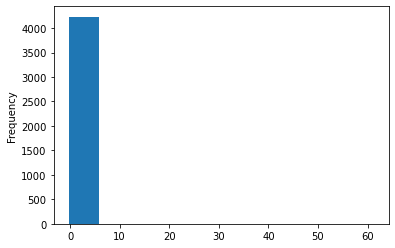

In [29]:
df.lotsizearea.plot.hist()

<AxesSubplot:>

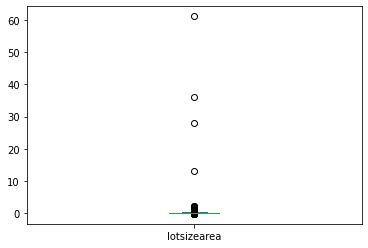

In [30]:
df.lotsizearea.plot.box()

With such a highly skewed, distribution, the median seems like the best representative value, so we will impute the median for this feature. 

#### lotfeatures

In [45]:
df.lotfeatures.isna().mean()

0.7204251386321626

In [46]:
df.lotfeatures.nunique()

143

With no reasonable way to impute values for this feature, and with such a high percentage of nulls, we will drop this column. 